In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
from subprocess import check_output
import warnings
import pandas as pd
import numpy as np
import sys
from causalgraphicalmodels import CausalGraphicalModel
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement causalnex (from versions: none)
ERROR: No matching distribution found for causalnex


In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest

In [16]:
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
data = pd.read_csv('../data/data_v2.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.23,0.28,0.15,0.24,0.08,0.85,0.91,5.98,86.20,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,1937.05,0.16,0.63,0.71,0.27,0.42,0.12
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1937.05,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,86.20,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,M,11.42,20.38,77.58,386.10,0.13,0.23,0.24,0.11,0.25,0.08,0.50,1.16,3.44,27.23,0.01,0.06,0.06,0.02,0.04,0.01,14.91,26.50,98.87,567.70,0.19,0.63,0.69,0.26,0.42,0.12
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,86.20,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [9]:
feature_list = ['diagnosis', 'perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se', 'fractal_dimension_worst', 'fractal_dimension_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_se', 'smoothness_se']

In [10]:
df = data.copy()

In [11]:
x = df[feature_list[:29]]
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,concavity_mean,concavity_worst,perimeter_se,radius_se,compactness_worst,compactness_mean,texture_worst,concave points_se,smoothness_worst,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,184.60,1937.05,25.38,0.27,0.15,122.80,1001.00,17.99,86.20,0.28,0.71,5.98,0.85,0.63,0.23,17.33,0.02,0.16,10.38,0.42,0.05,0.12,0.24,0.05,0.12,0.01,0.91,0.08
1,1,158.80,1937.05,24.99,0.19,0.07,132.90,1326.00,20.57,74.08,0.09,0.24,3.40,0.54,0.19,0.08,23.41,0.01,0.12,17.77,0.28,0.02,0.08,0.18,0.01,0.09,0.00,0.73,0.06
2,1,152.50,1709.00,23.57,0.24,0.13,130.00,1203.00,19.69,86.20,0.20,0.45,4.58,0.75,0.42,0.16,25.53,0.02,0.14,21.25,0.36,0.04,0.11,0.21,0.04,0.09,0.00,0.79,0.06
3,1,98.87,567.70,14.91,0.26,0.11,77.58,386.10,11.42,27.23,0.24,0.69,3.44,0.50,0.63,0.23,26.50,0.02,0.19,20.38,0.42,0.06,0.13,0.25,0.06,0.12,0.01,1.16,0.08
4,1,152.20,1575.00,22.54,0.16,0.10,135.10,1297.00,20.29,86.20,0.20,0.40,5.44,0.76,0.20,0.13,16.67,0.02,0.14,14.34,0.24,0.06,0.10,0.18,0.02,0.08,0.01,0.78,0.06


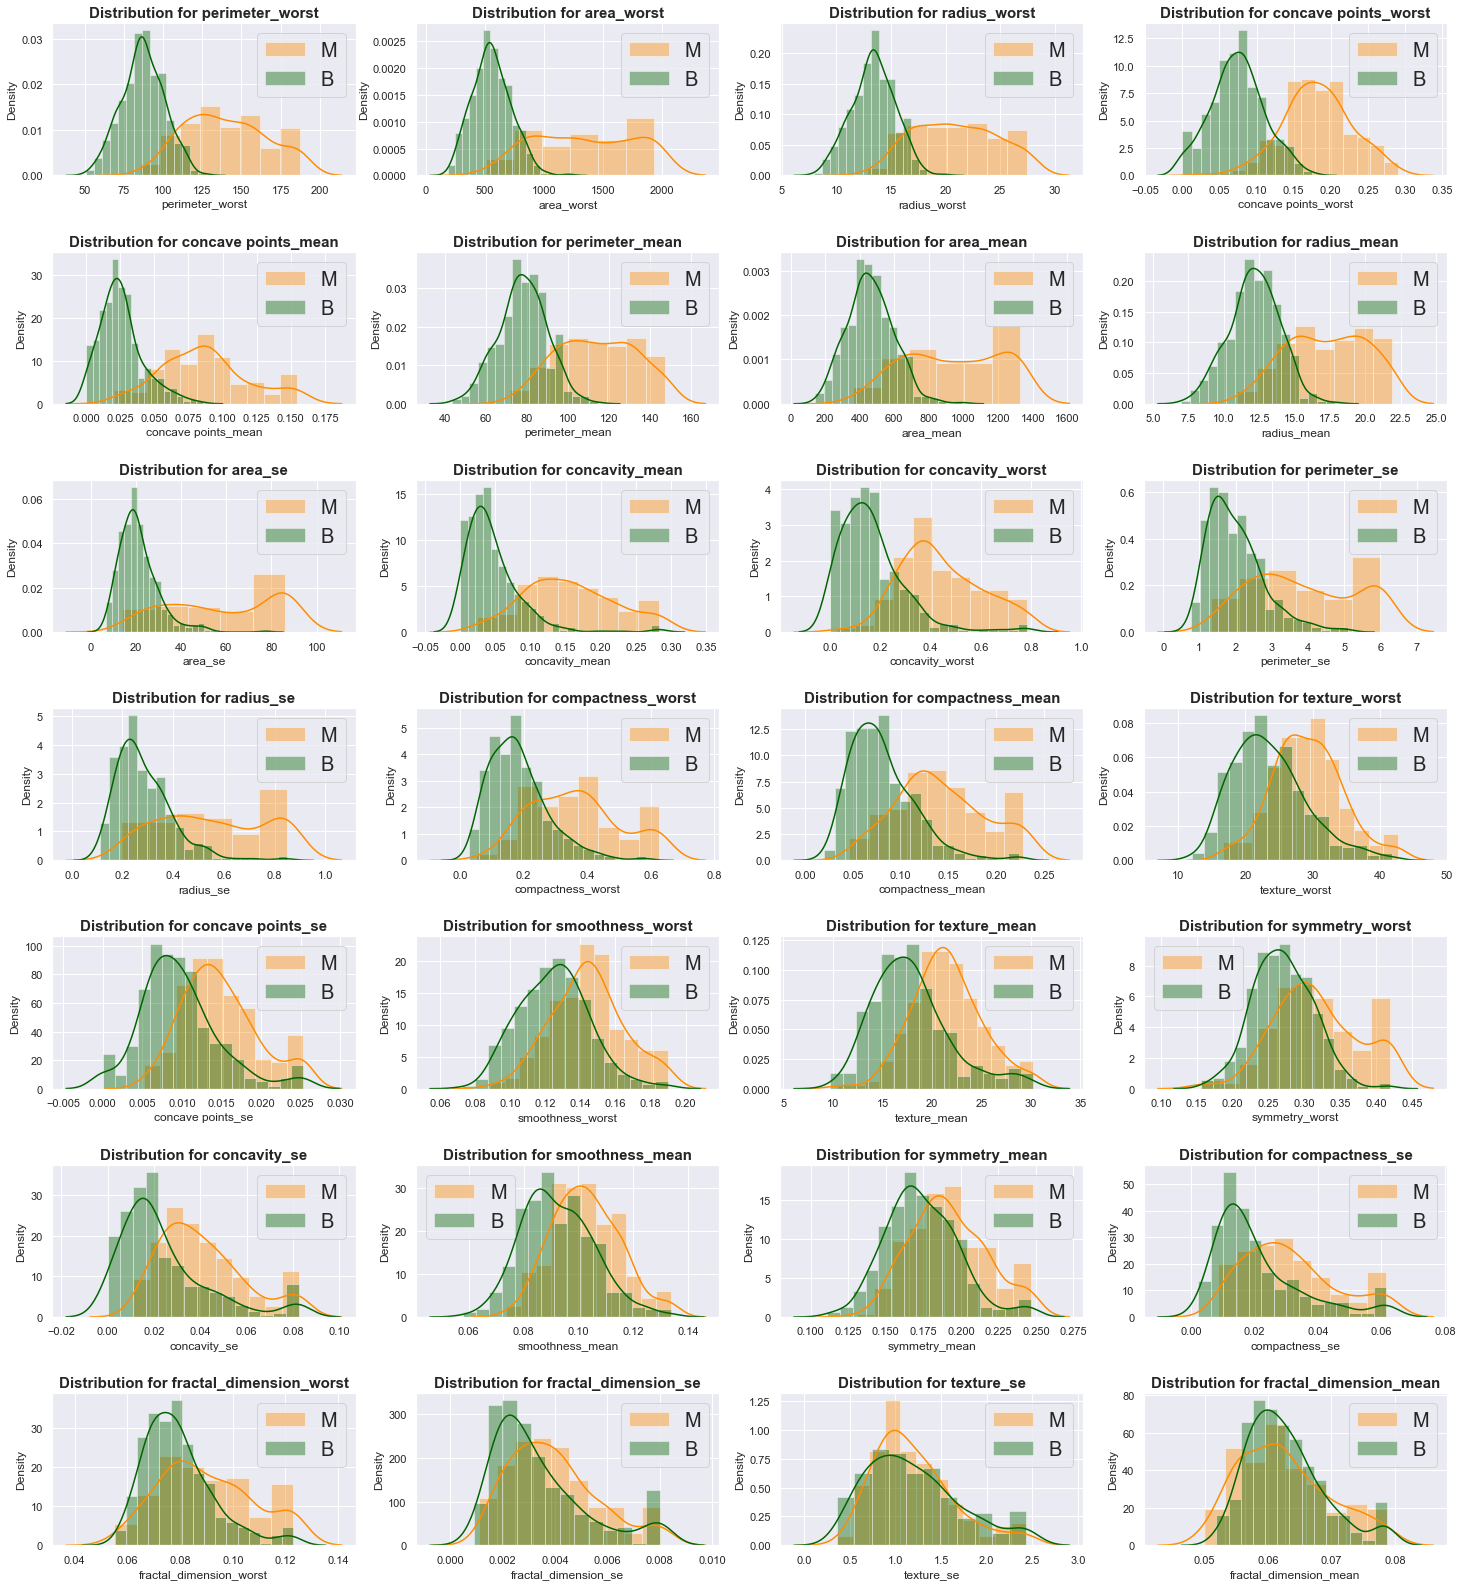

In [17]:
num_feat = x.shape[1]-1
fig = plt.figure(figsize=(25, num_feat))
fig.subplots_adjust(hspace=.5)
axs = [fig.add_subplot(int((num_feat / 4)), 4, i + 1) for i in range(num_feat)]

for i, column in enumerate(x.columns[1:]):
    sns.distplot(x[x.diagnosis == 1][column], ax=axs[i], color='darkorange', label="M")
    sns.distplot(x[x.diagnosis == 0][column], ax=axs[i], color='darkgreen', label="B")
    axs[i].set_title('Distribution for {}'.format( column), fontweight='bold', fontsize=15)
    axs[i].legend(fontsize=20)
plt.show()

In [14]:
!git add causal_graph.ipynb
!git commit -m "causal graph ploting"
!git push

The file will have its original line endings in your working directory


[feature_selection 9ab642a] causal graph ploting
 1 file changed, 340 insertions(+)
 create mode 100644 notebooks/causal_graph.ipynb


remote: This repository moved. Please use the new location:        
remote:   https://github.com/gezish/causal_inference_using_ml.git        
To https://github.com/gezish/causal_nference_using_ml.git
   49357b3..9ab642a  feature_selection -> feature_selection
